This chapter introduces a different clustering algorithm - k-means clustering - and its implementation in SciPy. K-means clustering overcomes the biggest drawback of hierarchical clustering that was discussed in the last chapter. As dendrograms are specific to hierarchical clustering, this chapter discusses one method to find the number of clusters before running k-means clustering. The chapter concludes with a discussion on the limitations of k-means clustering and discusses considerations while using this algorithm.

# 1- Basics of k-means clustering


video

# 2- K-means clustering: first exercise


<p>This exercise will familiarize you with the usage of k-means clustering on a dataset. Let us use the Comic Con dataset and check how k-means clustering works on it.</p>
<p>Recall the two steps of k-means clustering:</p>
<ul>
<li>Define cluster centers through <code>kmeans()</code> function. It has two required arguments: observations and number of clusters.</li>
<li>Assign cluster labels through the <code>vq()</code> function. It has two required arguments: observations and cluster centers.</li>
</ul>
<p>The data is stored in a Pandas data frame, <code>comic_con</code>. <code>x_scaled</code> and <code>y_scaled</code> are the column names of the standardized X and Y coordinates of people at a given point in time.</p>

In [5]:
#Preprocessing by me

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Import the whiten function
from scipy.cluster.vq import whiten

x= [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87, 83, 90,
 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27, 17, 17]

y= [4,  6, 0, 0, 4, 3, 1, 6, 5, 4, 6, 10, 8, 10, 97, 94, 99, 95, 95, 97, 99, 99,
 94, 99, 90, 98, 100, 93, 98, 15, 10, 0, 10, 7, 17, 15]


#Convert to pandas DataFrame
comic_con = pd.DataFrame({'x_coordinate': x,
'y_coordinate': y})

#scalling by whiten
comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


<ul>
<li>Import <code>kmeans</code> and <code>vq</code> functions in SciPy.</li>
<li>Generate cluster centers using the <code>kmeans()</code> function with two clusters.</li>
<li>Create cluster labels using these cluster centers.</li>
</ul>

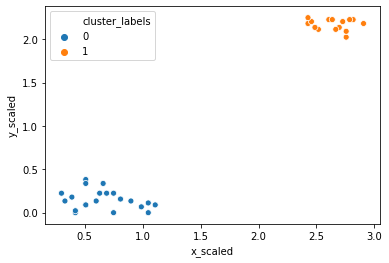

In [6]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled','y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

# 3- Runtime of k-means clustering


<p>Recall that it took a significantly long time to run hierarchical clustering. How long does it take to run the <code>kmeans()</code> function on the FIFA dataset?</p>
<p>The data is stored in a Pandas data frame, <code>fifa</code>. <code>scaled_sliding_tackle</code> and <code>scaled_aggression</code> are the relevant scaled columns. <code>timeit</code> and <code>kmeans</code> have been imported.</p>
<p>Cluster centers are defined through the <code>kmeans()</code> function. It has two required arguments: observations and number of clusters. You can use <code>%timeit</code> before a piece of code to check how long it takes to run. You can time the <code>kmeans()</code> function for three clusters on the <code>fifa</code> dataset.</p>

In [7]:
fifa2=pd.read_csv('datasets/fifa_18_dataset.csv')

#scalling by whiten
fifa2['scaled_sliding_tackle'] = whiten(fifa2['sliding_tackle'])
fifa2['scaled_aggression'] = whiten(fifa2['aggression'])


In [9]:
%timeit cluster_centers, distortion = kmeans(fifa2[['scaled_sliding_tackle','scaled_aggression']], 3)


398 ms ± 50.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 4- How many clusters?


video

# 5- Elbow method on distinct clusters


<p>Let us use the comic con data set to see how the elbow plot looks on a data set with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.</p>
<p>The data is stored in a Pandas data frame, <code>comic_con</code>. <code>x_scaled</code> and <code>y_scaled</code> are the column names of the standardized X and Y coordinates of people at a given point in time.</p>

<ul>
<li>Create a list of distortions for each cluster in <code>num_clusters</code>.</li>
<li>Create a data frame <code>elbow_plot</code> with <code>num_clusters</code> and <code>distortions</code>.</li>
<li>With the <code>.lineplot()</code> method, plot <code>elbow_plot</code> with <code>num_clusters</code> in the x axis and <code>distortions</code> in the y axis.</li>
</ul>

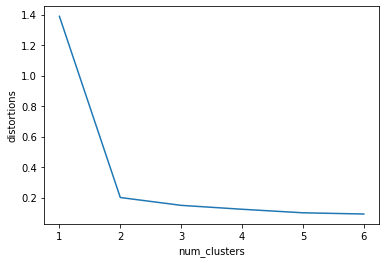

In [10]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

# 6- Elbow method on uniform data


<p>In the earlier exercise, you constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a data set with uniformly distributed points. You may want to display the data points on the console before proceeding with the exercise.</p>
<p>The data is stored in a Pandas data frame, <code>uniform_data</code>. <code>x_scaled</code> and <code>y_scaled</code> are the column names of the standardized X and Y coordinates of points.</p>

In [12]:
x_coordinate = [39, 42, 58, 43, 13, 32, 60, 13, 26, 27, 29, 51, 14, 50, 62, 59, 50,
       62, 65, 17, 25, 45, 55, 48, 42, 58, 68, 58, 37, 55]

y_coordinate = [3, 7, 3, 3, 6, 5, 3, 4, 0, 9, 6, 3, 0, 7, 4, 1, 3, 0, 2, 5, 9, 5,
       8, 6, 3, 1, 4, 2, 8, 7]


#Convert to pandas DataFrame
uniform_data = pd.DataFrame({'x_coordinate': x_coordinate,
'y_coordinate': y_coordinate})

#scalling by whiten
uniform_data['x_scaled'] = whiten(uniform_data['x_coordinate'])
uniform_data['y_scaled'] = whiten(uniform_data['y_coordinate'])

uniform_data.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,39,3,2.376199,1.152237
1,42,7,2.558984,2.688554
2,58,3,3.533835,1.152237
3,43,3,2.619912,1.152237
4,13,6,0.792066,2.304475


<ul>
<li>Create a list of distortions for each cluster in <code>num_clusters</code>.</li>
<li>Create a data frame <code>elbow_plot</code> with <code>num_clusters</code> and <code>distortions</code>.</li>
<li>With the <code>.lineplot()</code> method, plot <code>elbow_plot</code> with <code>num_clusters</code> in the x axis and <code>distortions</code> in the y axis.</li>
</ul>

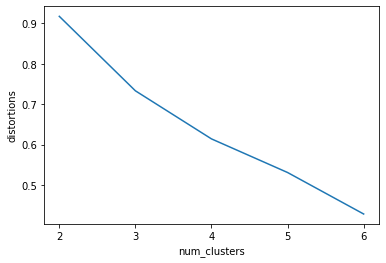

In [14]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled', 'y_scaled']],i)
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

# 7- Limitations of k-means clustering


video

# 8- Impact of seeds on distinct clusters


<p>You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.</p>
<p>The data is stored in a Pandas data frame, <code>comic_con</code>. <code>x_scaled</code> and <code>y_scaled</code> are the column names of the standardized X and Y coordinates of people at a given point in time.</p>

In [15]:
x= [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87, 83, 90,
 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27, 17, 17]

y= [4,  6, 0, 0, 4, 3, 1, 6, 5, 4, 6, 10, 8, 10, 97, 94, 99, 95, 95, 97, 99, 99,
 94, 99, 90, 98, 100, 93, 98, 15, 10, 0, 10, 7, 17, 15]


#Convert to pandas DataFrame
comic_con = pd.DataFrame({'x_coordinate': x,
'y_coordinate': y})

#scalling by whiten
comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

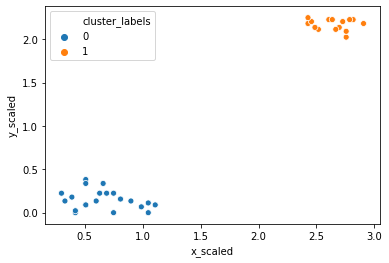

In [16]:
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

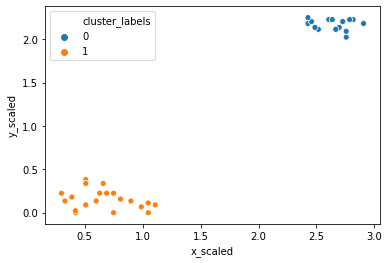

In [17]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

# 9- Uniform clustering patterns


<p>Now that you are familiar with the impact of seeds, let us look at the bias in k-means clustering towards the formation of uniform clusters.</p>
<p>Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.</p>
<p>Here is how a typical mouse-like dataset looks like (<a href="https://www.researchgate.net/figure/Clustering-results-for-the-Mouse-data-set-where-the-black-boxes-represent-the-centroids_fig3_256378655">Source</a>).</p>
<p><img src="https://assets.datacamp.com/production/repositories/3842/datasets/fa03a65258018a0c945528a987cdd250010de1ee/Clustering-results-for-the-Mouse-data-set-where-the-black-boxes-represent-the-centroids.ppm" alt></p>
<p>The data is stored in a Pandas data frame, <code>mouse</code>. <code>x_scaled</code> and <code>y_scaled</code> are the column names of the standardized X and Y coordinates of the data points.</p>

In [20]:
# Build the dataset bu me

x_coordinate = [33.87552801, 38.20874789, 35.74058788, 32.54696343, 62.06314583,
       53.76968389, 32.49035022, 55.32520176, 68.10254176, 53.28312355,
       67.71803005, 32.84550285, 61.78083409, 62.07246733, 37.2423105 ,
       48.39279681, 35.48978845, 65.60854566, 38.02888394, 65.49367503,
       41.60372439, 48.41398475, 41.8196699 , 51.7691827 , 45.17995059,
       38.02218597, 56.37185206, 52.05250382, 44.24373638, 40.3328119 ,
       53.5965755 , 45.87265296, 54.0000117 , 52.6886879 , 53.25422918,
       63.54212627, 65.38884629, 49.73312042, 48.58080531, 48.03000662,
       44.6671251 , 65.30935896, 40.58584807, 43.93533778, 32.87374964,
       43.17638646, 61.44735547, 47.90212636, 47.57275054, 50.65221647,
       45.44652101, 48.17757171, 50.11893028, 37.33082581, 53.28605845,
       32.60601743, 46.59545712, 54.91413224, 61.18758173, 62.256238  ,
       47.80710345, 65.44265167, 36.17446485, 60.90339818, 44.23811688,
       40.34232189, 57.19910238, 36.08806305, 35.56663867, 42.41968177,
       59.65269146, 32.62462929, 55.80216992, 65.4991867 , 45.54670964,
       61.00536902, 58.19939104, 63.11931771, 55.31708313, 45.60947216,
       45.63141645, 46.74818575, 68.28352429, 61.96714675, 48.96104619,
       45.37856388, 50.84116864, 52.56595621, 39.13493121, 48.99176373,
       58.05200858, 41.37122591, 64.35140055, 35.02226785, 48.60847435,
       42.64864932, 57.58495149, 49.08107021, 51.42659241, 62.31551719,
       26.84075282, 26.9519412 , 32.56213982, 27.10884541, 20.77972888,
       34.64864231, 27.3347144 , 38.63528806, 27.36278088, 22.25173068,
       23.56181791, 28.68340206, 33.84077613, 28.22316026, 38.08583938,
       29.88562784, 28.40850494, 31.72078699, 25.2107398 , 28.67688927,
       32.24862075, 26.38752714, 28.69901004, 26.07549743, 34.28710983,
       24.02682404, 30.83187787, 32.37571559, 22.76230802, 35.25122351,
       70.18239123, 79.58988482, 65.72716493, 68.483399  , 76.41358468,
       79.26874523, 64.84182259, 71.11774102, 78.34020408, 63.61846311,
       67.53968321, 69.15087805, 67.7921338 , 76.87140431, 62.00437158,
       67.49125961, 71.90747913, 65.27576084, 77.58529515, 79.66066418,
       77.3246352 , 68.5790018 , 65.97649575, 71.55575552, 69.83671683,
       70.49432188, 72.62743438, 67.66970193, 63.44559189, 75.45783601]


y_coordinate = [44.89342095, 41.11632695, 57.41800588, 57.21808249, 47.19694448,
       35.95195917, 42.02185361, 52.54832221, 52.31212456, 31.63628689,
       47.60524807, 54.23496141, 60.8249876 , 65.23558661, 48.23757709,
       67.52456486, 54.10211414, 51.8513512 , 39.82817721, 44.28386899,
       60.21348801, 45.35513786, 35.81066079, 56.95992181, 61.05673695,
       44.3455702 , 49.53371078, 57.76601798, 41.7427565 , 52.07742897,
       55.58701182, 43.81629667, 61.46690781, 44.37759236, 44.72275113,
       47.98225455, 47.73690086, 46.04982378, 56.78708413, 56.60380297,
       61.71604212, 56.52781557, 45.81317068, 49.10776882, 41.14505632,
       64.84595737, 62.46952021, 58.29912471, 48.53320807, 48.79467674,
       40.65821118, 30.46658829, 65.18053982, 41.7300068 , 69.24321762,
       56.00106984, 39.63738121, 38.40458709, 39.63915235, 38.73957078,
       36.00996935, 45.62729042, 57.17020665, 51.32130045, 40.89880525,
       41.15484687, 58.21497749, 43.45728537, 42.72274718, 39.27124659,
       42.66172394, 57.40714755, 34.25546896, 61.29461186, 30.51392786,
       65.03769516, 63.37885691, 62.92620573, 35.88019397, 52.89656063,
       37.25902081, 31.67028002, 47.16555533, 50.88239704, 41.7797539 ,
       49.38557057, 52.58865855, 40.89034886, 65.91171887, 46.57669291,
       63.55568215, 45.4501224 , 43.70526533, 46.58949707, 38.91660456,
       55.46764508, 67.89462117, 36.02362381, 59.98536063, 54.70049854,
       82.72356822, 77.94443633, 75.40050307, 68.91634077, 72.8427495 ,
       74.71747016, 70.61496975, 76.12679438, 80.60280865, 70.19696262,
       68.23133123, 83.83579387, 83.97371743, 70.71122299, 72.22425104,
       79.61715462, 74.81720151, 81.28549433, 79.83947613, 82.5450522 ,
       72.41216494, 74.6039565 , 68.84261456, 73.2893676 , 80.51600557,
       82.63965729, 66.38754732, 73.35737436, 72.53759838, 73.71960775,
       78.16166533, 75.99349931, 67.23738628, 82.50606009, 77.72556254,
       73.68057343, 83.33967753, 84.67897398, 71.78110972, 68.16591019,
       83.87925655, 74.22367682, 78.15268345, 74.21207007, 75.13106436,
       77.71960453, 71.08256275, 74.66344797, 80.3555998 , 73.34017066,
       70.12614603, 77.46797551, 77.65232497, 76.70948616, 73.94355101,
       71.19864361, 76.43418687, 70.62890953, 78.5744389 , 68.44893502]


#Convert to pandas DataFrame
mouse = pd.DataFrame({'x_coordinate': x_coordinate,
'y_coordinate': y_coordinate})

#scalling by whiten
mouse['x_scaled'] = whiten(mouse['x_coordinate'])
mouse['y_scaled'] = whiten(mouse['y_coordinate'])

mouse

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,33.875528,44.893421,2.209458,2.977524
1,38.208748,41.116327,2.492083,2.727011
2,35.740588,57.418006,2.331103,3.808208
3,32.546963,57.218082,2.122806,3.794948
4,62.063146,47.196944,4.047935,3.130303
...,...,...,...,...
155,70.494322,71.198644,4.597840,4.722198
156,72.627434,76.434187,4.736968,5.069442
157,67.669702,70.628910,4.413610,4.684411
158,63.445592,78.574439,4.138102,5.211393


------------------------

<ul>
<li>Import <code>kmeans</code> and <code>vq</code> functions in SciPy.</li>
<li>Generate cluster centers using the <code>kmeans()</code> function with three clusters.</li>
<li>Create cluster labels with <code>vq()</code> with the cluster centers generated above.</li>
</ul>

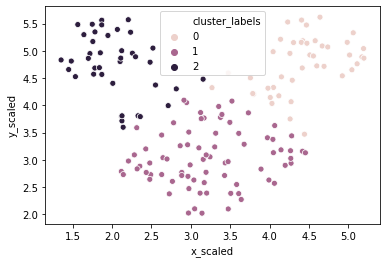

In [21]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq


# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled','y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled','y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

# 10- FIFA 18: defenders revisited


In [26]:
# Get the data from DataCamp

scaled_def = [1.54134839, 1.2143957 , 1.40122581, 1.96171614, 2.80245162,
       1.77488603, 2.70903657, 1.49464087, 3.40964948, 1.16768818,
       4.11026238, 2.10183872, 2.28866883, 1.86830108, 3.36294195,
       2.66232904, 1.07427312, 4.20367744, 2.14854625, 1.12098065,
       2.42879141, 1.40122581, 2.89586668, 1.7281785 , 4.06355486,
       4.11026238, 4.11026238, 4.15696991, 1.12098065, 2.98928173,
       4.15696991, 1.49464087, 1.49464087, 3.78330969, 3.68989464,
       3.17611184, 2.19525377, 3.87672475, 1.96171614, 3.87672475,
       3.17611184, 2.80245162, 1.77488603, 2.61562152, 4.01684733,
       2.70903657, 1.96171614, 1.86830108, 2.52220646, 3.83001722,
       1.58805592, 3.78330969, 2.14854625, 3.83001722, 1.63476345,
       1.82159356, 4.06355486, 3.92343227, 1.86830108, 3.78330969,
       4.01684733, 1.68147097, 4.06355486, 4.11026238, 1.0275656 ,
       2.84915915, 1.16768818, 4.01684733, 1.96171614, 1.35451829,
       3.92343227, 1.12098065, 3.92343227, 1.16768818, 3.03598926,
       1.77488603, 2.47549894, 2.52220646, 2.47549894, 2.28866883,
       2.10183872, 4.01684733, 3.78330969, 2.98928173, 4.01684733,
       2.19525377, 3.12940431, 3.54977206, 3.9701398 , 3.87672475,
       2.2419613 , 3.83001722, 3.92343227, 4.11026238, 3.92343227,
       1.82159356, 2.10183872, 4.01684733, 2.98928173, 1.68147097,
       3.87672475, 1.58805592, 1.2143957 , 3.9701398 , 2.2419613 ,
       4.01684733, 3.87672475, 3.64318711, 3.73660217, 3.64318711,
       1.7281785 , 2.2419613 , 3.64318711, 1.96171614, 1.49464087,
       2.28866883, 3.73660217, 2.00842366, 2.61562152, 1.49464087,
       3.9701398 , 1.7281785 , 3.9701398 , 3.92343227, 3.59647959,
       1.44793334, 2.14854625, 2.19525377, 1.54134839, 2.89586668,
       3.92343227, 2.38208388, 2.89586668, 3.2695269 , 3.87672475,
       2.94257421, 3.64318711, 3.87672475, 2.10183872, 1.35451829,
       1.40122581, 3.92343227, 3.73660217, 3.83001722, 1.30781076,
       3.87672475, 2.14854625, 3.83001722, 1.30781076, 2.89586668,
       3.9701398 , 2.61562152, 3.92343227, 3.87672475, 1.35451829,
       1.77488603, 3.87672475, 2.70903657, 2.84915915, 1.58805592,
       3.12940431, 2.00842366, 3.73660217, 2.00842366, 3.73660217,
       3.92343227, 3.9701398 , 1.63476345, 3.64318711, 1.26110323,
       1.82159356, 3.03598926, 3.03598926, 3.87672475, 2.89586668,
       2.56891399, 2.38208388, 1.7281785 , 3.68989464, 1.63476345,
       3.78330969, 3.92343227, 3.64318711, 2.84915915, 3.50306453,
       2.94257421, 4.01684733, 3.50306453, 2.05513119, 2.84915915,
       3.83001722, 1.77488603, 1.12098065, 3.78330969, 2.66232904,
       0.84073549, 3.2695269 , 2.70903657, 2.33537635, 1.63476345,
       3.78330969, 3.54977206, 1.44793334, 3.36294195, 1.35451829,
       3.83001722, 1.58805592, 1.30781076, 3.31623442, 1.91500861,
       1.35451829, 2.00842366, 3.59647959, 3.87672475, 1.12098065,
       2.00842366, 2.84915915, 2.42879141, 3.03598926, 3.83001722,
       1.68147097, 3.87672475, 3.83001722, 3.40964948, 3.54977206,
       3.12940431, 1.54134839, 2.14854625, 1.07427312, 1.2143957 ,
       3.78330969, 3.78330969, 2.10183872, 1.16768818, 3.9701398 ,
       3.36294195, 2.47549894, 2.84915915, 1.7281785 , 1.7281785 ,
       2.28866883, 3.78330969, 3.87672475, 2.14854625, 2.84915915,
       1.49464087, 3.73660217, 3.87672475, 3.83001722, 2.19525377]


scaled_phy = [ 8.9221865 ,  6.8031672 ,  6.69163987,  9.03371383, 10.14898714,
        9.14524116,  9.59135048,  7.36080386,  7.80691319,  8.25302251,
        9.25676849,  8.36454984,  9.59135048,  8.69913183,  7.24927653,
        8.47607717,  8.02996785,  9.47982315, 10.03745981,  7.47233119,
        9.70287782,  7.58385852,  7.02622187,  7.91844052,  9.03371383,
        9.36829582,  8.81065917,  8.47607717,  6.46858521,  9.14524116,
        8.81065917,  9.14524116,  7.02622187,  9.36829582,  7.58385852,
        9.81440515,  7.02622187,  9.36829582,  9.03371383,  8.81065917,
        7.91844052,  7.36080386,  6.8031672 ,  9.70287782,  8.47607717,
        6.46858521,  9.25676849,  7.58385852,  6.91469454,  8.25302251,
        9.36829582,  9.36829582,  7.91844052,  9.03371383,  7.1377492 ,
        7.1377492 ,  8.9221865 ,  9.03371383,  9.81440515,  9.25676849,
        8.9221865 ,  6.13400322,  9.36829582,  8.5876045 ,  8.25302251,
        7.1377492 ,  6.46858521,  8.9221865 ,  9.25676849,  7.02622187,
        8.81065917,  8.25302251,  9.59135048,  5.57636656,  8.47607717,
        8.5876045 ,  8.9221865 ,  7.80691319,  9.47982315,  9.47982315,
        9.03371383,  9.36829582,  8.02996785,  7.91844052,  8.69913183,
        7.58385852,  7.69538585,  8.25302251,  9.03371383,  9.36829582,
        9.47982315,  8.81065917,  9.25676849,  8.14149518,  9.36829582,
        6.8031672 ,  6.8031672 ,  8.69913183,  8.69913183,  8.36454984,
        8.81065917,  7.1377492 ,  7.80691319,  9.59135048,  9.14524116,
        9.25676849,  8.81065917,  8.5876045 ,  9.70287782,  9.14524116,
        6.91469454,  8.81065917,  8.5876045 ,  8.36454984,  8.02996785,
        7.1377492 ,  9.36829582,  9.47982315,  9.14524116,  6.13400322,
        9.14524116,  8.25302251,  8.69913183,  8.69913183,  7.36080386,
        6.46858521,  8.9221865 ,  8.25302251,  6.24553055,  7.80691319,
        9.03371383,  9.14524116,  7.80691319,  7.91844052,  9.03371383,
        8.69913183,  8.47607717,  9.25676849,  7.36080386,  9.36829582,
        7.36080386,  8.47607717,  9.25676849,  8.81065917,  6.13400322,
        9.47982315,  8.5876045 ,  9.70287782,  8.47607717,  8.81065917,
        8.47607717,  8.69913183,  8.69913183,  9.03371383,  7.02622187,
        8.47607717,  9.03371383,  7.1377492 ,  7.69538585,  5.46483923,
        8.14149518,  9.25676849,  9.03371383,  5.24178457,  9.81440515,
        8.69913183,  8.36454984,  7.24927653,  8.02996785,  6.35705788,
        6.13400322,  9.70287782,  8.25302251,  8.5876045 ,  7.47233119,
        8.81065917,  8.9221865 ,  7.69538585,  9.03371383,  7.24927653,
        8.9221865 ,  8.9221865 ,  9.47982315,  8.9221865 ,  9.36829582,
        7.24927653,  8.9221865 ,  8.36454984,  9.25676849,  7.02622187,
        8.5876045 ,  6.35705788,  7.1377492 ,  9.14524116,  9.14524116,
        6.69163987,  9.25676849,  8.9221865 ,  8.69913183,  7.80691319,
        9.25676849,  9.25676849,  8.36454984,  8.25302251,  7.80691319,
        8.69913183,  7.24927653,  7.24927653,  9.03371383,  8.25302251,
        7.47233119,  7.47233119,  8.36454984,  9.03371383,  7.80691319,
        8.47607717,  7.91844052,  9.14524116,  7.69538585,  8.81065917,
        7.02622187,  8.25302251,  8.81065917,  8.9221865 ,  8.47607717,
        8.81065917,  7.58385852,  6.8031672 ,  5.68789389,  6.8031672 ,
        9.47982315,  9.25676849,  6.91469454,  7.36080386,  8.5876045 ,
        8.69913183,  7.58385852,  7.69538585,  8.5876045 ,  8.69913183,
        9.03371383,  9.03371383,  9.03371383,  7.24927653,  7.24927653,
        7.1377492 ,  8.47607717,  9.25676849, 10.14898714,  7.02622187]



#Convert to pandas DataFrame
fifa_sub = pd.DataFrame({'scaled_def': scaled_def,
'scaled_phy': scaled_phy})



In [27]:
fifa_sub

,scaled_def,scaled_phy
0,1.541348,8.922187
1,1.214396,6.803167
2,1.401226,6.691640
3,1.961716,9.033714
4,2.802452,10.148987
...,...,...
245,1.494641,7.137749
246,3.736602,8.476077
247,3.876725,9.256768
248,3.830017,10.148987


<p>In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:</p>
<ul>
<li><em>defending</em>: a number which signifies the defending attributes of a player</li>
<li><em>physical</em>: a number which signifies the physical attributes of a player</li>
</ul>
<p>These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.</p>
<p>The following modules have been pre-loaded: <code>kmeans</code>, <code>vq</code> from <code>scipy.cluster.vq</code>, <code>matplotlib.pyplot</code> as <code>plt</code>, <code>seaborn</code> as <code>sns</code>. The data for this exercise is stored in a Pandas dataframe, <code>fifa</code>. The scaled variables are <code>scaled_def</code> and <code>scaled_phy</code>.</p>

###### I Get the Two columns only and put them in fifa_sum

- Initialize the random seed to the list [1000,2000].
- Fit the scaled data in columns scaled_def and scaled_phy into a k-means clustering algorithm with 3 clusters and assign cluster labels.
- Display cluster centers of each cluster with respect to the scaled columns by calculating the mean value for each cluster.
- Create a seaborn scatter plot with scaled_def on the x-axis and scaled_phy on the y-axis, with each cluster represented by a different color.

                scaled_def  scaled_phy
cluster_labels                        
0                 3.743692    8.867419
1                 1.865936    7.082691
2                 2.096297    8.944870


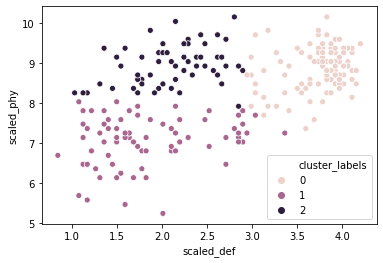

In [32]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa_sub[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa_sub['cluster_labels'], _ = vq(fifa_sub[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa_sub[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa_sub)
plt.show()

                scaled_def  scaled_phy
cluster_labels                        
0                 2.096297    8.944870
1                 3.743692    8.867419
2                 1.865936    7.082691


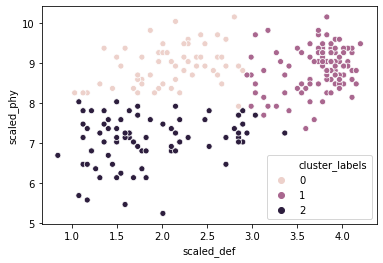

In [33]:
# Set up a random seed in numpy
#random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa_sub[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa_sub['cluster_labels'], _ = vq(fifa_sub[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa_sub[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa_sub)
plt.show()